In [17]:

import pandas as pd

import numpy as np
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import scale



In [10]:
email_rec=pd.read_csv("Spam.txt",sep=",",header=None)

In [11]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [14]:
#data preparation
x=email_rec.drop("spam",axis=1)
y=email_rec.spam.values.astype(int)

In [18]:
#scaling the data
x_scaled=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

In [22]:
model=SVC(C=1,kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [23]:
#model evaluation
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

accuracy: 0.9290369297610427
Precision: 0.9429133858267716
Recall: 0.8740875912408759


In [28]:
#create a Kfold object with the splits
folds=KFold(n_splits=5,shuffle=True,random_state=4)
#specify the range of the hyperparameters
#set the parameters by the cross validation
hyper_params=[{'gamma':[1e-2,1e-3,1e-4],
              "C":[1,10,100,1000]}]
#specify model
model=SVC(kernel='rbf')
#set the grid searchcv
model_cv=GridSearchCV(estimator=model,param_grid=hyper_params,
                      scoring='accuracy',
                      verbose=1,
                      return_train_score=True)
#fit the model
model_cv.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.170991,0.012316,0.049628,0.001233,1,0.01,"{'C': 1, 'gamma': 0.01}",0.944099,0.925466,0.945652,...,0.934472,0.010997,6,0.938276,0.944099,0.940217,0.946040,0.939829,0.941693,0.002899
1,0.252052,0.014639,0.076215,0.003393,1,0.001,"{'C': 1, 'gamma': 0.001}",0.914596,0.894410,0.897516,...,0.899689,0.007518,10,0.906056,0.905280,0.901786,0.908385,0.906056,0.905512,0.002135
2,0.397510,0.033516,0.124497,0.007724,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.785714,0.790373,0.776398,...,0.787578,0.011171,12,0.788043,0.786879,0.791149,0.786102,0.792314,0.788898,0.002423
3,0.156160,0.009486,0.038335,0.001415,10,0.01,"{'C': 10, 'gamma': 0.01}",0.947205,0.928571,0.939441,...,0.936335,0.007543,3,0.955745,0.966227,0.961568,0.961180,0.962345,0.961413,0.003354
4,0.170438,0.003746,0.048106,0.003078,10,0.001,"{'C': 10, 'gamma': 0.001}",0.939441,0.930124,0.936335,...,0.931988,0.005415,7,0.932453,0.937888,0.932453,0.945652,0.936335,0.936957,0.004846
5,0.276434,0.031521,0.078256,0.005212,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.908385,0.894410,0.891304,...,0.896273,0.006319,11,0.898292,0.902174,0.899845,0.903339,0.896351,0.900000,0.002535
6,0.170339,0.007265,0.030415,0.000981,100,0.01,"{'C': 100, 'gamma': 0.01}",0.944099,0.927019,0.939441,...,0.936335,0.006133,3,0.979037,0.982919,0.982531,0.980202,0.981755,0.981289,0.001461
7,0.142831,0.005731,0.033583,0.001068,100,0.001,"{'C': 100, 'gamma': 0.001}",0.945652,0.931677,0.937888,...,0.936335,0.007795,3,0.945264,0.951475,0.945264,0.950699,0.949534,0.948447,0.002672
8,0.169382,0.006088,0.048024,0.001738,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.937888,0.922360,0.934783,...,0.927019,0.007857,8,0.923137,0.933618,0.928571,0.935171,0.930901,0.930280,0.004228
9,0.294778,0.026171,0.028991,0.001269,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.917702,0.914596,0.914596,...,0.918944,0.005141,9,0.992236,0.994177,0.992624,0.990295,0.994953,0.992857,0.001621


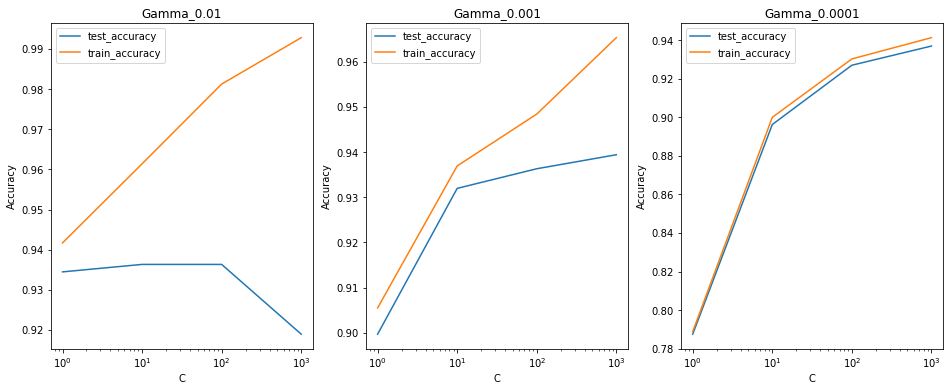

In [35]:
cv_results["param_C"]=cv_results["param_C"].astype('int')
#plotting
plt.figure(figsize=(16,6))
plt.subplot(131)
gamma_01=cv_results[cv_results["param_gamma"]==0.01]
plt.plot(gamma_01["param_C"],gamma_01['mean_test_score'])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Gamma_0.01')
plt.legend(["test_accuracy",'train_accuracy'],loc="upper left")
plt.xscale("log")
#subplot 2/3
plt.subplot(132)
gamma_01=cv_results[cv_results["param_gamma"]==0.001]
plt.plot(gamma_01["param_C"],gamma_01['mean_test_score'])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Gamma_0.001')
plt.legend(["test_accuracy",'train_accuracy'],loc="upper left")
plt.xscale("log")
#subplot 3/3
plt.subplot(133)
gamma_01=cv_results[cv_results["param_gamma"]==0.0001]
plt.plot(gamma_01["param_C"],gamma_01['mean_test_score'])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Gamma_0.0001')
plt.legend(["test_accuracy",'train_accuracy'],loc="upper left")
plt.xscale("log")


In [39]:
#printing the optimal accuracy and hyperparameters
best_scores=model_cv.best_score_
best_hyperparams=model_cv.best_params_
print(f'score:{best_scores}\n best_hyperparameters:{best_hyperparams}')


score:0.9394409937888198
 best_hyperparameters:{'C': 1000, 'gamma': 0.001}


In [43]:
#building the final model
#specify the hyperparameters
best_params={"C":100,"gamma":0.00001,"kernel":'rbf'}
#model
model=SVC(C=100,gamma=0.00001,kernel="rbf")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred),"\n")
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Sensitivity/Recall:",metrics.recall_score(y_test,y_pred))

[[804  29]
 [111 437]] 

accuracy 0.8986241853729182
Precision: 0.9377682403433476
Sensitivity/Recall: 0.7974452554744526


In [ ]:
#it is concluded that accuracy achieved using non-linear kernel is comparable to that of linear one
#and in this example we do notreally need non_linear kernel